# PyTorch

note: benchmark results of DDP\
date: 230224a\
author: EI

### on JURECA DC-GPU

In [1]:
import os, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
%matplotlib inline
sns.set()
pd.options.display.max_columns = None

In [2]:
plt.rcParams['figure.figsize'] = [12, 6]

In [3]:
df = pd.read_csv('/Users/einanc/Work/FZJJURECA/Synthetic/result-csv.dat',header=0)
df.rename(columns=lambda x: x.split('[')[0], inplace=True)

# speedup
df["Speedup - ideal"] = df["Nnodes"].astype(float)
df["Speedup"] = df["Naet"].iloc[0] / df["Naet"]

# efficiency
df["Threadscaled Sim. Time / s"] = df["Naet"] * df["Nnodes"] * df["Nworkers"]
df["Efficiency"] = df["Threadscaled Sim. Time / s"].iloc[0] / df["Threadscaled Sim. Time / s"]
df.head()

,ID,Nnodes,Nworkers,prefetchF,batchSize,Nepochs,learningRate,calcTime,avgEpochT,Naet,memoryGPU,avgTestLoss,avgMeanDiff,Speedup - ideal,Speedup,Threadscaled Sim. Time / s,Efficiency
0,0,1,32,2,1,1,0.0001,54.46,54.46,54.460,34.4,NaN,NaN,1.0,1.000000,1742.720,1.000000
1,1,2,32,2,1,1,0.0001,54.87,54.87,27.435,34.3,NaN,NaN,2.0,1.985056,1755.840,0.992528
2,2,4,32,2,1,1,0.0001,55.13,55.13,13.783,34.3,NaN,NaN,4.0,3.951244,1764.224,0.987811
3,3,8,32,2,1,1,0.0001,55.72,55.72,6.965,34.3,NaN,NaN,8.0,7.819095,1783.040,0.977387
4,4,16,32,2,1,1,0.0001,55.95,55.95,3.497,34.3,NaN,NaN,16.0,15.573349,1790.464,0.973334


## Overview

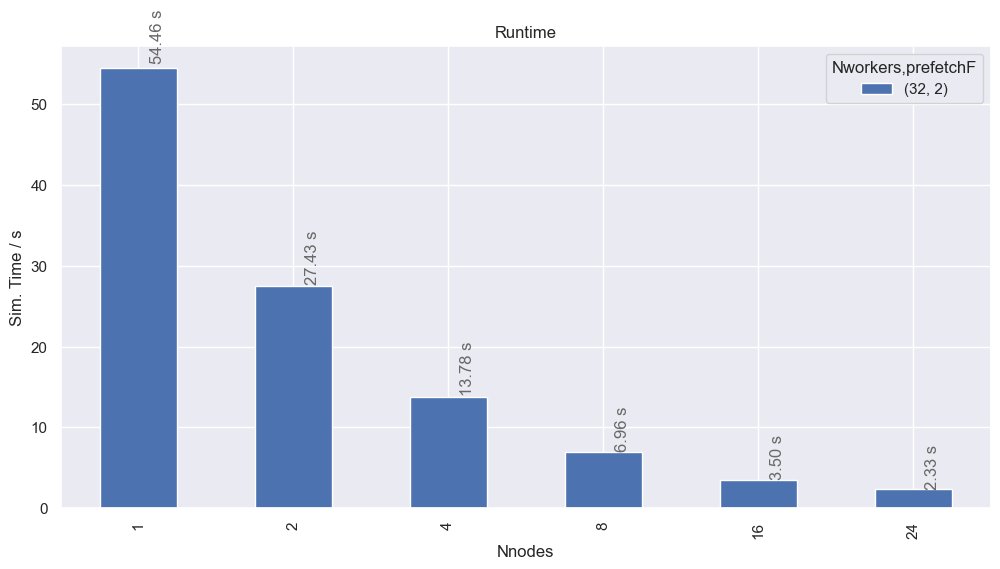

In [4]:
ax = df.pivot_table(index=["Nnodes"], columns=["Nworkers", "prefetchF"], values="Naet").plot(kind="bar", title="Runtime");
ax.set_ylabel("Sim. Time / s");
ax_abs = ax
for p in ax.patches:
    ax.annotate("{:.2f} s".format(p.get_height()), (p.get_x() + p.get_width()/1.33, p.get_height() * 1.01), color="dimgray", horizontalalignment="center", verticalalignment="bottom", rotation="vertical")

## Scaling Behaviour

(0.0, 25.0)

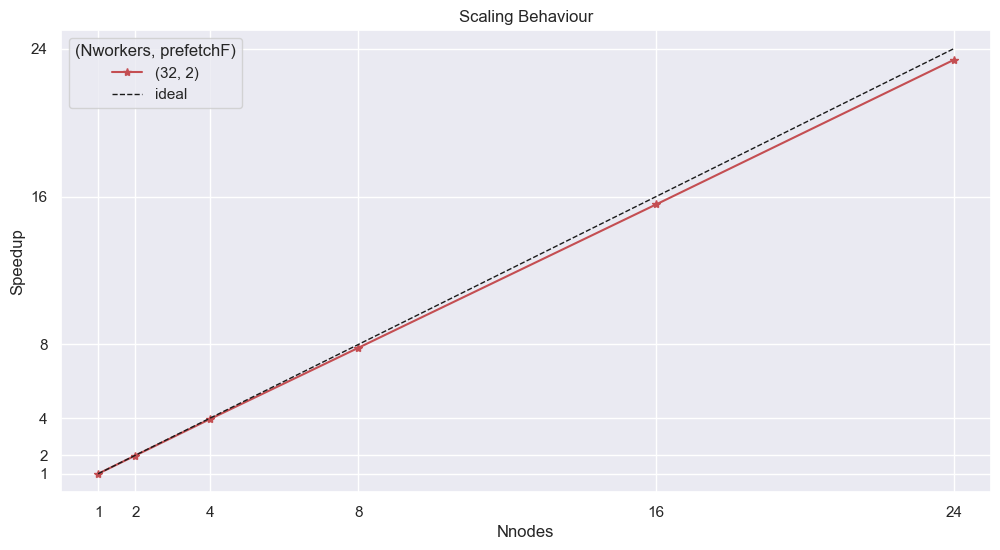

In [5]:
ax = df.pivot_table(index=["Nnodes"], columns=["Nworkers", "prefetchF"], values="Speedup").plot(style="*-", loglog=False, title="Scaling Behaviour", color="r", legend=False);
ax.plot(df["Nnodes"].values,df["Speedup - ideal"].values,ls='dashed',lw=1.0,c='k',label="ideal")

ax.legend(ncol=1, title="(Nworkers, prefetchF)")
ax.set_xticks(df["Nnodes"].values)
ax.set_yticks(df["Speedup - ideal"].values)
ax.set_ylabel(r'Speedup')
ax.set_xlim((0,np.amax(df["Nnodes"].values+1)))
ax.set_ylim((0,np.amax(df["Speedup - ideal"].values+1)))

## Runtime Efficiencies

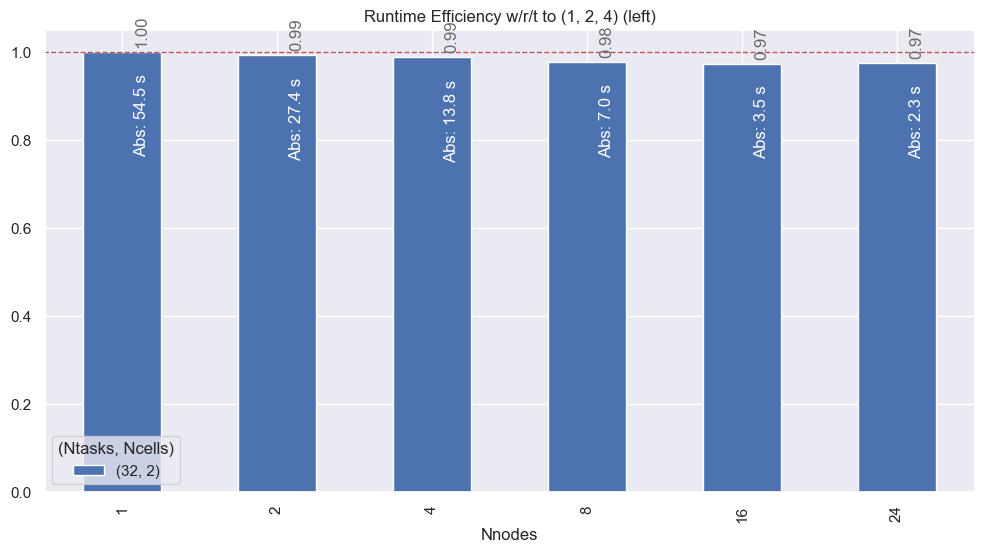

In [6]:
ax = df.pivot_table(index=["Nnodes"], columns=["Nworkers", "prefetchF"], values="Efficiency").plot(kind="bar", legend=False, title="Runtime Efficiency w/r/t to (1, 2, 4) (left)")
ax.legend(ncol=1, title="(Ntasks, Ncells)",loc=3)
for p, abs in zip(ax.patches, ax_abs.patches):
    ax.annotate("{:.2f}".format(p.get_height()), (p.get_x() + p.get_width()/1.33, p.get_height() * 1.01), color="dimgray", horizontalalignment="center", verticalalignment="bottom", rotation="vertical")
    ax.annotate("Abs: {:.1f} s".format(abs.get_height()), (p.get_x() + p.get_width()/1.33, p.get_height() * 0.95), color="white", horizontalalignment="center", verticalalignment="top", rotation="vertical")
ax.plot(df["Nnodes"].values-2,df["Speedup - ideal"].values*0+1,ls='dashed',lw=1.0,c='r',label="ideal")

In [7]:
# EOF